## Predicting Bike Rentals
Today, we will be testing different models to see which method is the best for predicting the amount of bikes rented in a given hour.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [3]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


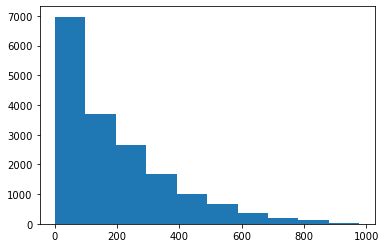

In [11]:
%matplotlib inline
plt.hist(bike_rentals['cnt'])
plt.show()

In [12]:
## See how each column correlates with count column
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

We can see that the casual, registered, temperature, hours columns have some correlation to how many bikes are rented. Casual and registered will not be used for training since the count is derived from those two columns. casual + registered = cnt.

## Calculating Features

In [23]:
## Create a function that takes in a numeric value and returns 
## if that hour given is morning(1), afternoon(2), evening(3), night(4)

def assign_label(num):
    if num >=0 and num < 6:
        return 4
    elif num >=6 and num < 12:
        return 1
    elif num >= 12 and num < 18:
        return 2
    elif num >= 18 and num <=24:
        return 3

In [24]:
## Apply it to hour column
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [25]:
bike_rentals.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


## Splitting Data

In [26]:
from sklearn.metrics import mean_squared_error

train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

features = list(train.columns)
features.remove('casual')
features.remove('cnt')
features.remove('registered')
features.remove('dteday')
features

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [35]:
## Train linear regression model
lr = LinearRegression()
lr.fit(train[features], train['cnt'])
predictions = lr.predict(test[features])
mse = mean_squared_error(test['cnt'],predictions)
mse

17161.39227845688

This error is quite high, but we should compare this to following methods to see which one produces the lowest error.

## Decision Tree
Next, we will use a decision tree model to see if it yields a lower error, we will also experiment with the parameters to see which one would be the best to reduce overfitting

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=17,min_samples_leaf=5)
dt.fit(train[features], train['cnt'])
predictions = dt.predict(test[features])
mse = mean_squared_error(test['cnt'],predictions)
mse

2861.4321771814425

Having a max depth of about 15-18 and minimum leaf samples of 3-5 reduces our error, possibly due to it not overfitting as much as before.

## Random Forests

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train[features], train['cnt'])
predictions = rf.predict(test[features])
mse = mean_squared_error(test['cnt'],predictions)
mse

1764.101561018412

This random forest model with no addition parameters has a significantly lower error than linear regression and a single decision tree